# Libraries Installation

In [31]:
!pip install yfinance -q
!pip install pandas -q
!pip install numpy -q
!pip install matplotlib -q


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [33]:
import yfinance as yf
import pandas as pd
import numpy as np

# Setup portfolio

In [50]:
amount_to_invest = 50_000.0
assets = ["PETR3.SA", "CMIG3.SA", "CPLE6.SA", "RANI3.SA", "TAEE11.SA", "FESA4.SA", "UNIP6.SA"]
weights = [32.5183, 18.4078, 12.6776, 11.1030, 10.3605, 9.1889, 5.7439]

In [51]:
if sum(weights) != 100.0:
    sum(weights)

In [52]:
buy_orders = {
    asset: (weights / 100) * amount_to_invest
    for asset, weights in zip(assets, weights)
}

In [53]:
buy_orders

{'PETR3.SA': 16259.150000000003,
 'CMIG3.SA': 9203.900000000001,
 'CPLE6.SA': 6338.8,
 'RANI3.SA': 5551.5,
 'TAEE11.SA': 5180.25,
 'FESA4.SA': 4594.45,
 'UNIP6.SA': 2871.95}

In [54]:
if sum(buy_orders.values()) != amount_to_invest:
    sum(buy_orders.values())

In [55]:
assets = list(buy_orders.keys())

In [56]:
assets

['PETR3.SA',
 'CMIG3.SA',
 'CPLE6.SA',
 'RANI3.SA',
 'TAEE11.SA',
 'FESA4.SA',
 'UNIP6.SA']

In [57]:
total_invested = sum(buy_orders.values())

In [58]:
total_invested

50000.0

# Import financial assets data

In [59]:
start = "2017-02-01"

assets_history_price = yf.download(assets, start=start, progress=False)["Adj Close"]

# Dummy portfolio simulation

In [60]:
first_line = assets_history_price.iloc[0]
first_line

CMIG3.SA      4.455539
CPLE6.SA      1.778329
FESA4.SA      6.051053
PETR3.SA      6.434494
RANI3.SA      2.162255
TAEE11.SA    11.382806
UNIP6.SA      2.045254
Name: 2017-02-01 00:00:00, dtype: float64

In [61]:
buy_orders_df = pd.Series(data = buy_orders, index=assets)

In [62]:
number_of_shares = round(buy_orders_df / first_line, 0)

In [63]:
net_worth = assets_history_price * number_of_shares

In [64]:
net_worth["Total net worth"] = net_worth.sum(axis=1)

In [65]:
net_worth

,CMIG3.SA,CPLE6.SA,FESA4.SA,PETR3.SA,RANI3.SA,TAEE11.SA,UNIP6.SA,Total net worth
Date,,,,,,,,
2017-02-01,9205.144042,6337.965883,4592.748901,16259.967590,5550.509322,5179.176650,2871.536605,49997.048993
2017-02-02,9615.273934,6465.322914,4614.160777,16038.055955,5550.509322,5222.037277,2855.359305,50360.719485
2017-02-03,9906.921354,6517.062172,4603.454839,16481.878019,5550.509322,5231.563163,2851.314646,51142.703515
2017-02-06,9788.441837,6415.574983,4571.338111,16108.668256,5530.758809,5164.888473,2891.758229,50471.428698
2017-02-07,9742.872944,6495.171587,4603.454839,15906.927777,5550.509322,5131.551127,2871.536605,50302.024201
...,...,...,...,...,...,...,...,...
2023-08-04,39171.358109,30579.119728,38784.898842,83087.762699,27004.221810,16191.813316,114720.838715,349540.013219
2023-08-07,38572.220158,30757.320408,37570.500000,83643.696144,28085.397628,16125.270538,113007.957001,347762.361876
2023-08-08,39150.701576,30792.961224,36963.300579,83593.164627,27312.880881,16066.050625,112320.000000,346199.059512


# Comparison with IBOV

In [66]:
ibov = yf.download("^BVSP", start=start, progress=False)["Adj Close"]

In [67]:
ibov_df = pd.DataFrame(ibov)

In [68]:
ibov_df.rename(columns={"Adj Close": "IBOV"}, inplace=True)

In [69]:
comparison = pd.merge(ibov_df, net_worth, how = "inner", on = "Date")

In [70]:
comparison

,IBOV,CMIG3.SA,CPLE6.SA,FESA4.SA,PETR3.SA,RANI3.SA,TAEE11.SA,UNIP6.SA,Total net worth
Date,,,,,,,,,
2017-02-01,64836.000000,9205.144042,6337.965883,4592.748901,16259.967590,5550.509322,5179.176650,2871.536605,49997.048993
2017-02-02,64578.000000,9615.273934,6465.322914,4614.160777,16038.055955,5550.509322,5222.037277,2855.359305,50360.719485
2017-02-03,64954.000000,9906.921354,6517.062172,4603.454839,16481.878019,5550.509322,5231.563163,2851.314646,51142.703515
2017-02-06,63993.000000,9788.441837,6415.574983,4571.338111,16108.668256,5530.758809,5164.888473,2891.758229,50471.428698
2017-02-07,64199.000000,9742.872944,6495.171587,4603.454839,15906.927777,5550.509322,5131.551127,2871.536605,50302.024201
...,...,...,...,...,...,...,...,...,...
2023-08-04,119508.000000,39171.358109,30579.119728,38784.898842,83087.762699,27004.221810,16191.813316,114720.838715,349540.013219
2023-08-07,119380.000000,38572.220158,30757.320408,37570.500000,83643.696144,28085.397628,16125.270538,113007.957001,347762.361876
2023-08-08,119090.000000,39150.701576,30792.961224,36963.300579,83593.164627,27312.880881,16066.050625,112320.000000,346199.059512


### Data normalization (data scaling)

In [71]:
comparison = comparison.dropna()
comparison_scaling = comparison / comparison.iloc[0]

In [72]:
comparison_scaling

,IBOV,CMIG3.SA,CPLE6.SA,FESA4.SA,PETR3.SA,RANI3.SA,TAEE11.SA,UNIP6.SA,Total net worth
Date,,,,,,,,,
2017-02-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2017-02-02,0.996021,1.044554,1.020094,1.004662,0.986352,1.000000,1.008276,0.994366,1.007274
2017-02-03,1.001820,1.076238,1.028258,1.002331,1.013648,1.000000,1.010115,0.992958,1.022914
2017-02-06,0.986998,1.063367,1.012245,0.995338,0.990695,0.996442,0.997241,1.007042,1.009488
2017-02-07,0.990175,1.058416,1.024804,1.002331,0.978288,1.000000,0.990804,1.000000,1.006100
...,...,...,...,...,...,...,...,...,...
2023-08-04,1.843235,4.255377,4.824753,8.444812,5.109959,4.865179,3.126330,39.951028,6.991213
2023-08-07,1.841261,4.190290,4.852869,8.180395,5.144149,5.059968,3.113481,39.354524,6.955658
2023-08-08,1.836788,4.253133,4.858493,8.048187,5.141041,4.920788,3.102047,39.114946,6.924390


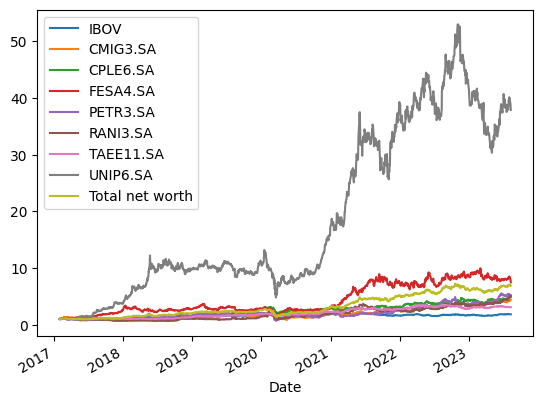

In [73]:
comparison_scaling.plot();

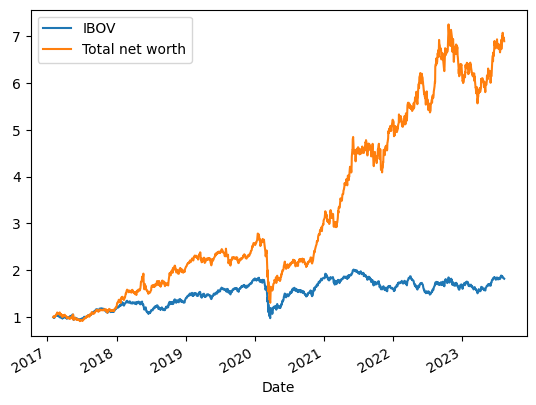

In [74]:
comparison_scaling[["IBOV", "Total net worth"]].plot();